In [260]:
!pip3 install fredapi > /dev/null


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [261]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
import getpass

In [262]:
fred_key = getpass.getpass(prompt='Enter fred api key: ')

Enter fred api key:  ········


# 1. Create the Fred Object

In [263]:
fred = Fred(api_key=fred_key)

In [264]:
fred

# 2. Search for economic data

In [265]:
sp_search = fred.search('S&P',order_by='popularity')

In [266]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-07-14   2024-07-14   
CSUSHPINSA          CSUSHPINSA     2024-07-14   2024-07-14   
SP500                    SP500     2024-07-14   2024-07-14   
MEHOINUSA672N    MEHOINUSA672N     2024-07-14   2024-07-14   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-07-14   2024-07-14   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-07-11  Daily, Close   
CSUSHPINSA            1987-01-01      2024-04-01       Monthly   
SP500                 2014-07-14      2024-07-12  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-07-11  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-07-12 08:49:08-05:00   
CSUSHPINSA                           NSA  2024-06-25 08:12:01-05:00   
SP500                                NSA  2024-07-12 19:20:56-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-07-12 08:49:09-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3. Pull Raw Data & Plot

In [267]:
sp500 = fred.get_series(series_id = 'SP500')

<Axes: title={'center': 'S&P 500'}>

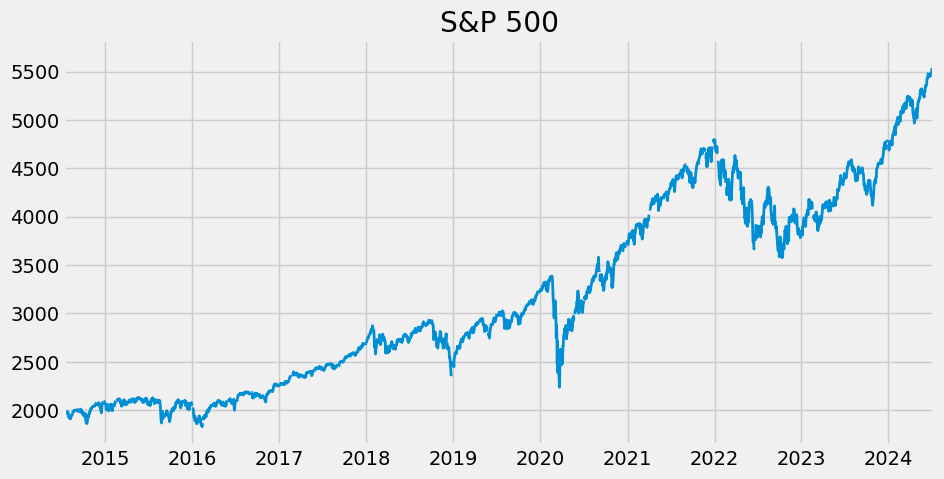

In [268]:
sp500.plot(figsize=(10, 5), title='S&P 500',lw=2)

# 4. Pull and Join Mulptiple Data Series

In [269]:
unemployment_results = fred.search('unemployment')

In [270]:
unrate = fred.get_series('UNRATE')

Text(0.5, 1.0, 'Unemployment Rate US')

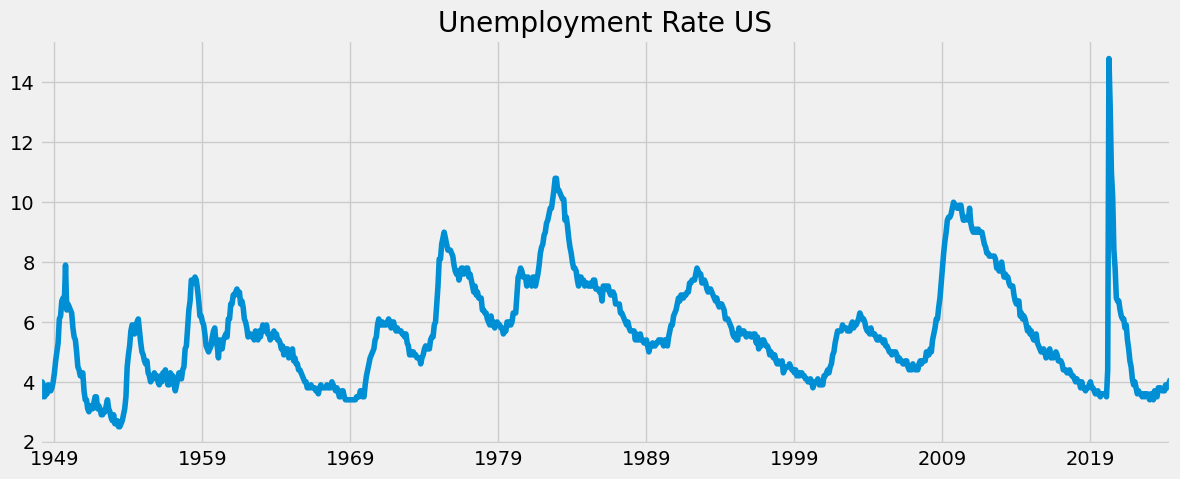

In [336]:
fig,ax = plt.subplots(figsize=(13,5))
unrate.plot(ax=ax)
ax.set_title('Unemployment Rate US')

In [272]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [273]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_states = pd.concat(all_results, axis=1).drop(['M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'M08311USM156SNBR','LNS14000026','LNS14000048', 'LNS14000089',  'LNS14000150','LRUN25TTUSM156S', 'LRUNTTTTUSM156S','LNS14000061','LNS14000025', 'LNS14024230', 'LNS14000006', 'LNS14000024', 'LNS14000031', 'LNS14000002', 'LNS14000009','LNS14000003', 'LNS14000001','LNS14027660', 'LNS14027662', 'LNS14024887', 'LRUN64TTUSM156S', 'LNS14032183', 'LNS14000012', 'LNS14027659', 'LASMT261982000000003', 'LNS14000060', 'LNS14000028', 'LASMT391746000000003', 'LNS14000018', 'LNS14000036', 'LNS14000032', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689', 'LNS14100000', 'LNS14000315', 'LNS14000029', 'LRHUTTTTUSM156S','UNRATE','CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],axis=1).drop(['2024-06-01'])

In [274]:
unemp_states = unemp_states.drop(['U2RATE'],axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]


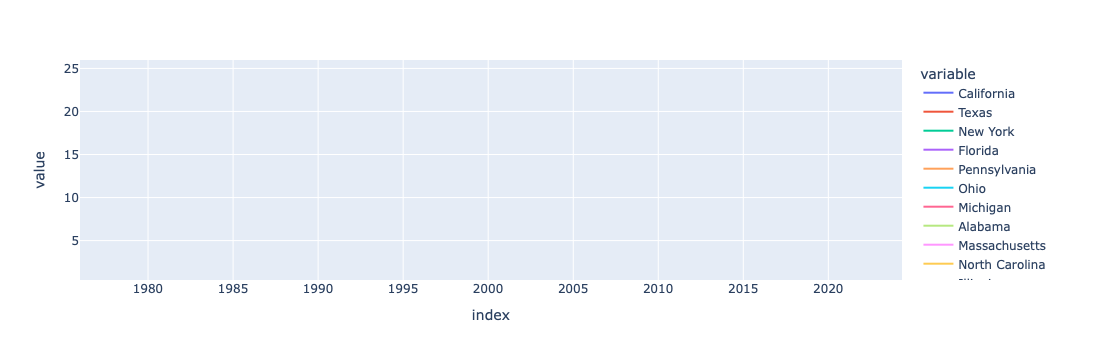

In [275]:
#plot states unemployment rate
px.line(unemp_states)

# Pull May 2020 Unemployment Rate per State

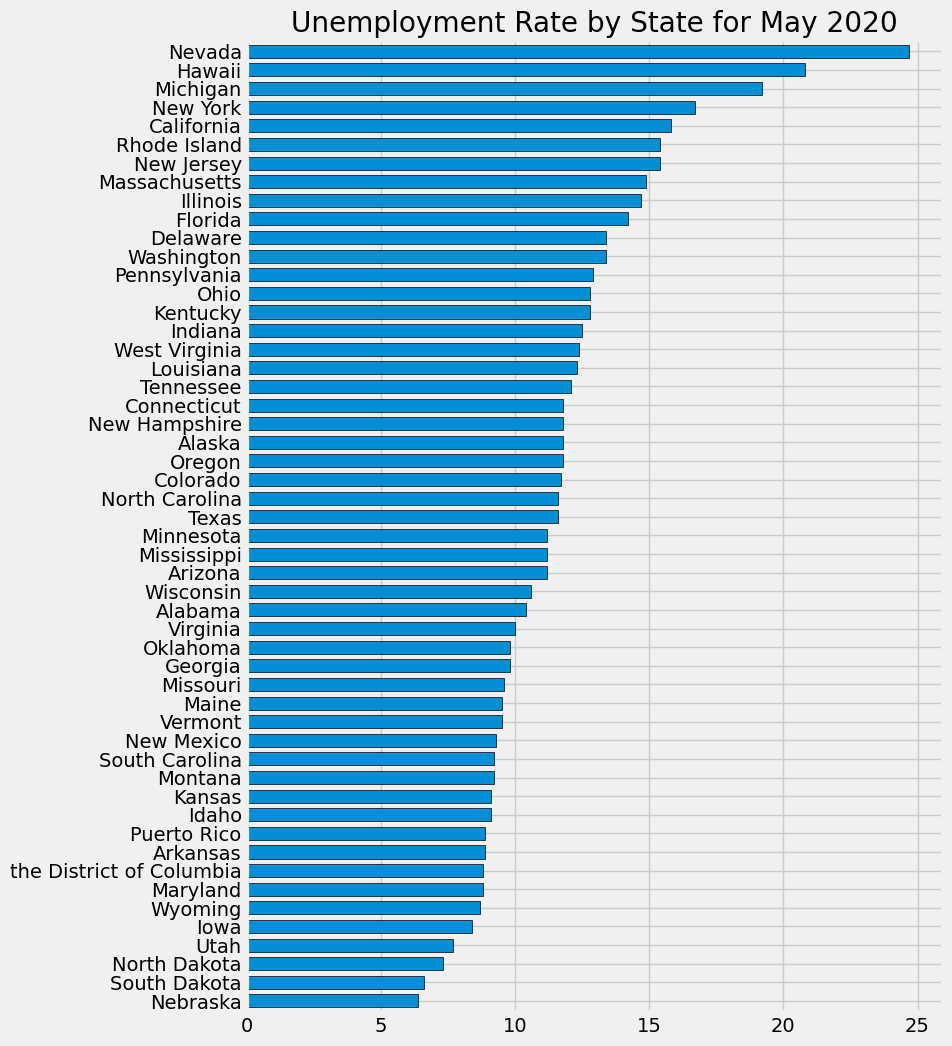

In [276]:
ax = unemp_states.loc[unemp_states.index =='2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh',figsize=(8, 12),width = 0.7, edgecolor='black',title='Unemployment Rate by State for May 2020')
ax.legend().remove()
plt.show()

# 5. Pull participation Rate


In [277]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [278]:
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-07-14   2024-07-14   
LNS11300060          LNS11300060     2024-07-14   2024-07-14   
LNS11300002          LNS11300002     2024-07-14   2024-07-14   
LNS11300001          LNS11300001     2024-07-14   2024-07-14   
LNS11324230          LNS11324230     2024-07-14   2024-07-14   
...                          ...            ...          ...   
LRIN74MAUSM156S  LRIN74MAUSM156S     2024-07-14   2024-07-14   
LRIN64MAUSM156S  LRIN64MAUSM156S     2024-07-14   2024-07-14   
LRIN64FEUSM156S  LRIN64FEUSM156S     2024-07-14   2024-07-14   
LRIN55FEUSM156S  LRIN55FEUSM156S     2024-07-14   2024-07-14   
LRIN25FEUSM156S  LRIN25FEUSM156S     2024-07-14   2024-07-14   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-06-01   Monthly               M   
LNS11300060            1948-01-01      2024-06-01   Monthly               M   
LNS11300002            1948-01-01      2024-06-01   Monthly               M   
LNS11300001            1948-01-01      2024-06-01   Monthly               M   
LNS11324230            1948-01-01      2024-06-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74MAUSM156S        1981-01-01      2024-05-01   Monthly               M   
LRIN64MAUSM156S        1977-01-01      2024-05-01   Monthly               M   
LRIN64FEUSM156S        1977-01-01      2024-05-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2024-05-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2024-05-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2024-07-05 07:52:03-05:00   
LNS11300060                            SA 2024-07-05 07:52:05-05:00   
LNS11300002                            SA 2024-07-05 07:52:07-05:00   
LNS11300001                            SA 2024-07-05 07:52:07-05:00   
LNS11324230                           

In [279]:
part_df = part_df.loc[part_df.title.str.contains('Labor Force Participation Rate for')]

In [280]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()
part_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    part_results.append(results)
part_states = pd.concat(part_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# Plot Unemployment vs Participation

In [348]:

unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

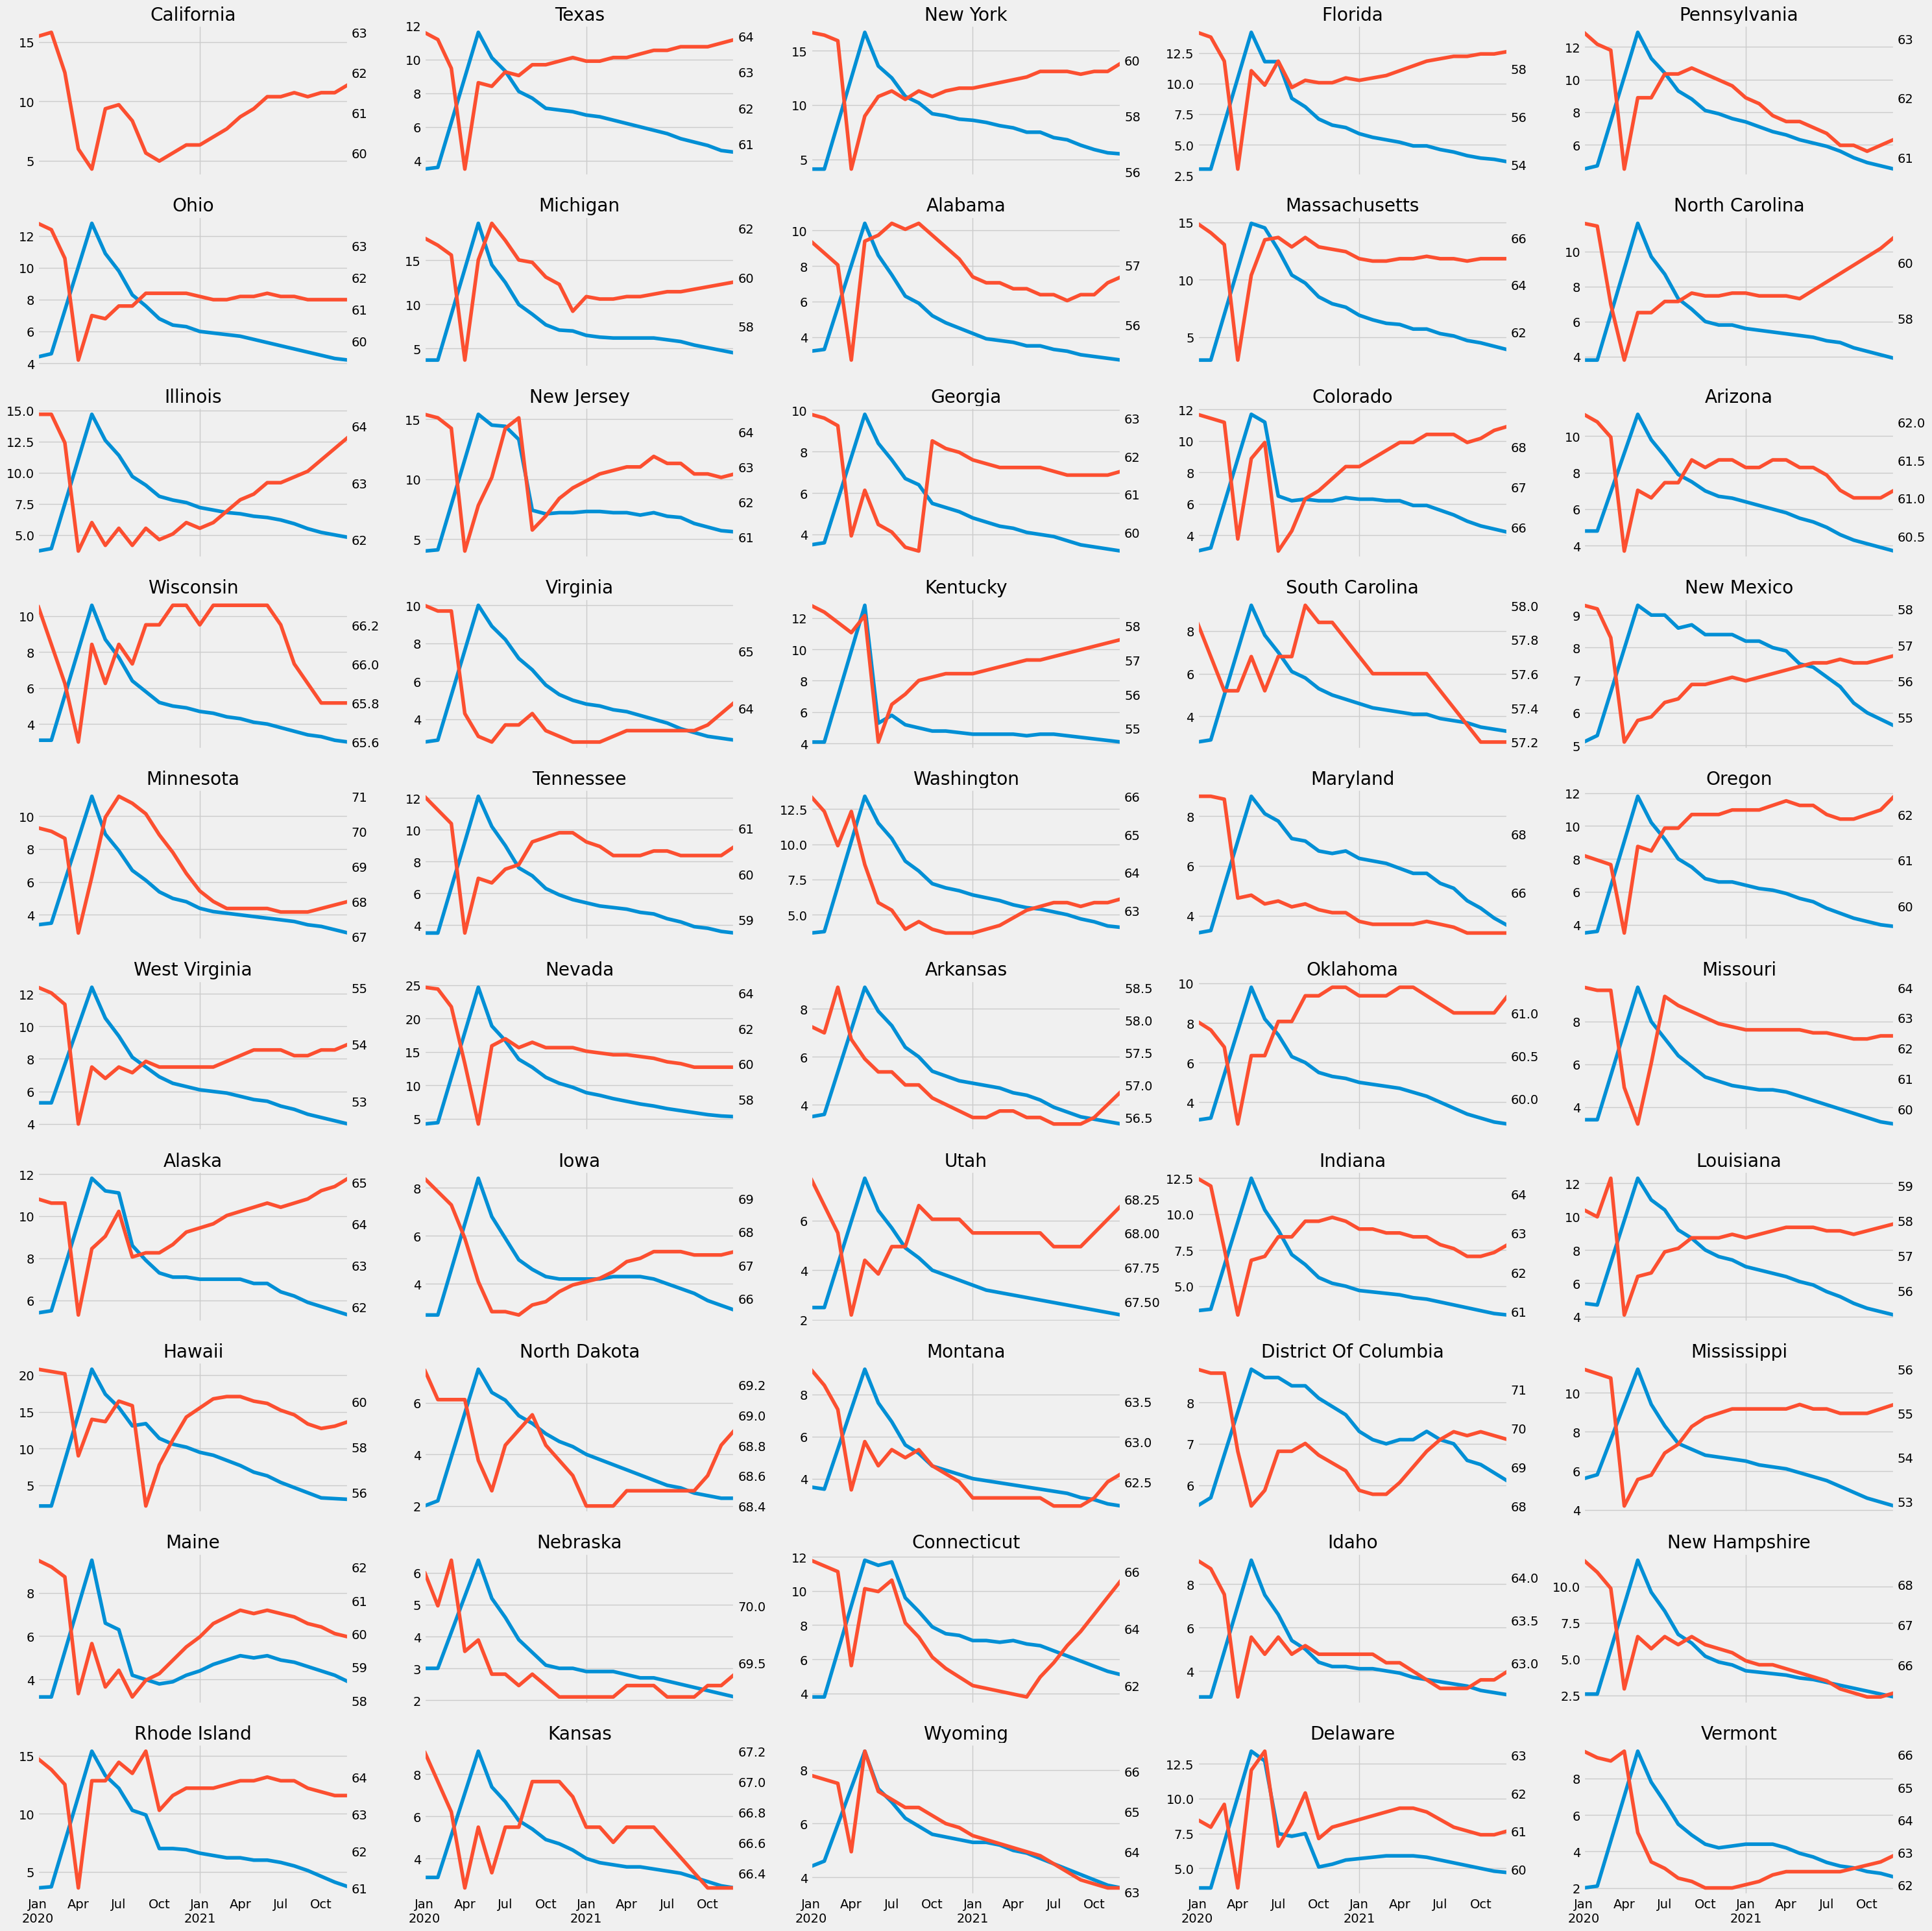

In [350]:
fig, axs = plt.subplots(10,5, figsize=(30,30),sharex=True)
axs = axs.flatten()
i = 0
for state in unemp_states.columns:
    if state == 'the District Of Columbia':
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i],label='Unemployment')
    part_states.query('index >=2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i+=1
    if i==50:
        break
plt.tight_layout()
plt.show()



In [346]:
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')